In [1]:
from numba import njit, jit
from optimization_methods import *
# %pylab inline

In [2]:
import numpy as np
n = 8000
coords = np.random.rand(n,30,3)
# coords = np.arange(n)
r = np.arange(coords.shape[0])
sequence = np.random.permutation(r)
inv_sequence = np.array([np.where(sequence == i)[0][0] for i in r])

def scramble(array, sequence):
    return np.array([array[s] for s in sequence])

def unscramble(array, inv_sequence):
    return np.array([array[s] for s in inv_sequence])

In [3]:
%%time
# unscramble(scramble(coords, sequence), inv_sequence)
scramble(coords, sequence)

Wall time: 16.9 ms


array([[[0.17702778, 0.82022242, 0.00154794],
        [0.95439141, 0.08695793, 0.93755595],
        [0.89370404, 0.32005014, 0.86446199],
        ...,
        [0.7952737 , 0.66051119, 0.881778  ],
        [0.59288788, 0.86545673, 0.80813549],
        [0.82901356, 0.98966677, 0.01967863]],

       [[0.62842845, 0.71126438, 0.26968794],
        [0.41072348, 0.36793741, 0.58722998],
        [0.19506156, 0.87149432, 0.74469549],
        ...,
        [0.49313487, 0.7171699 , 0.82956489],
        [0.33012294, 0.74650758, 0.32687171],
        [0.50402725, 0.63338496, 0.50324531]],

       [[0.4569615 , 0.39301875, 0.45465638],
        [0.85480002, 0.93033515, 0.40670966],
        [0.40544384, 0.72599828, 0.27398664],
        ...,
        [0.28190014, 0.47115838, 0.00161878],
        [0.99025261, 0.14924377, 0.28585009],
        [0.81817997, 0.61003   , 0.28657734]],

       ...,

       [[0.96277466, 0.82553614, 0.79037106],
        [0.33862526, 0.39183739, 0.47326546],
        [0.02222876, 0

In [6]:
jitted = njit()(scramble)

In [7]:
# %%time
# jitted(coords, sequence)

In [8]:
np.where(sequence == 3)[0]

array([4428], dtype=int64)

In [9]:
from optimization_methods import pre_prune_conformers
from time import time

In [14]:
times = {
    8000:[]
    # 2000:[],
    # 1000:[],
    # 500:[],
    # 100:[]
    }
ks = (1000,500,200,100)
for n in times:
    for k in ks:
        coords = np.random.rand(n,30,3)
        atomnos = np.random.choice([1,6,7], 30)
        print(n,k)
        t1 = time()
        _,_ = pre_prune_conformers(coords, atomnos, k=k)
        t2 = time()
        times[n].append(t2-t1)

8000 1000
8000 500
8000 200
8000 100


Text(0, 0.5, 'Time (s)')

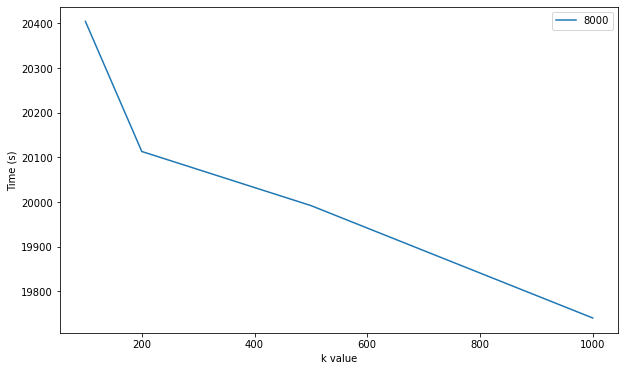

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
for t in times:
    times_y = [a*b for a, b in zip(ks, times[t])]
    plt.plot(ks, times_y, label=t)
plt.legend()
plt.xlabel('k value')
plt.ylabel('Time (s)')